# Medicare RX Spending from 2010 to 2015

Organized by Team Gold Experience: Jerome Amose, Racine Ellis, Shawn Varghese, Charles Phil, and Travis Lucas

In [2]:
#clean data for everyone
#Dropping all drugs with 0's in total spending in any year 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter




file = pd.read_csv("resources/health-medicare-drug-spending.csv")

zero_spending = file.loc[file.total_spending == 0]
drugs_to_drop = zero_spending["brand_name"].unique()
file = file[file.brand_name.isin(drugs_to_drop) ==  False]
file

clean_file = file.loc[file.brand_name != "Depo-Medrol; Methylprednisolone Acetate"]
clean_file

,year,brand_name,generic_name,coverage_type,total_spending,beneficiary_count,unit_count,beneficiary_cost_share,total_annual_spending_per_user,average_cost_per_unit,average_annual_beneficiary_cost_share,claim_count,beneficiary_count_lis,beneficiary_count_no_lis,beneficiary_cost_share_lis,beneficiary_cost_share_no_lis,average_beneficiary_cost_share_lis,average_beneficiary_cost_share_no_lis,serialid
0,2010,Abilify,Aripiprazole,Part D,1.225885e+09,338626,71848190,38186677.97,3620.17,17.06,NaN,2296081,"287,370","51,256",6931345.55,31255332.42,24.12,609.79,1
1,2011,Abilify,Aripiprazole,Part D,1.469590e+09,360670,77471756,33752894.08,4074.61,18.97,NaN,2447867,"303,264","57,406",7000137.54,26752756.54,23.08,466.03,2
2,2012,Abilify,Aripiprazole,Part D,1.758054e+09,376601,82161700,39700089.43,4668.21,21.40,NaN,2572017,"310,592","66,009",6594393.26,33105696.17,21.23,501.53,3
3,2013,Abilify,Aripiprazole,Part D,2.107092e+09,396764,86150300,46564692.85,5310.69,24.46,NaN,2886837,"317,698","79,066",6872985.09,39691707.76,21.63,502.01,4
4,2014,Abilify,Aripiprazole,Part D,2.527319e+09,405161,88198691,49598419.68,6237.83,28.65,NaN,2964075,"326,791","78,369",6334112.63,43264307.05,19.38,552.06,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2011,Xolair,Omalizumab,Part B,1.264406e+08,7986,6057220,25464222.87,15832.78,20.87,3188.61,87775,NaN,NaN,NaN,NaN,NaN,NaN,554
554,2012,Xolair,Omalizumab,Part B,1.506477e+08,8650,6723978,30263311.96,17415.92,22.40,3498.65,97351,NaN,NaN,NaN,NaN,NaN,NaN,555
555,2013,Xolair,Omalizumab,Part B,1.770849e+08,9451,7349730,36023943.79,18737.16,24.09,3811.65,106547,NaN,NaN,NaN,NaN,NaN,NaN,556
556,2014,Xolair,Omalizumab,Part B,2.201255e+08,11463,8432875,44902840.91,19203.13,26.10,3917.20,122625,NaN,NaN,NaN,NaN,NaN,NaN,557


In [3]:
benef_cost_df = clean_file[["coverage_type", "beneficiary_cost_share_lis", "beneficiary_cost_share_no_lis" ]]
clean_benef_df = benef_cost_df.dropna(how="any")
clean_benef_df

,coverage_type,beneficiary_cost_share_lis,beneficiary_cost_share_no_lis
0,Part D,6931345.55,3.125533e+07
1,Part D,7000137.54,2.675276e+07
2,Part D,6594393.26,3.310570e+07
3,Part D,6872985.09,3.969171e+07
4,Part D,6334112.63,4.326431e+07
...,...,...,...
547,Part D,9505.49,4.006190e+05
548,Part D,552264.01,1.952772e+07
549,Part D,2407672.35,7.987834e+07
550,Part D,4440035.46,1.494103e+08


In [4]:
share_lis_sum = clean_benef_df["beneficiary_cost_share_lis"].sum()
share_nolis_sum = clean_benef_df["beneficiary_cost_share_no_lis"].sum()


([<matplotlib.axis.XTick at 0x21413895f40>,
 [Text(0, 0, 'Low-Income Subsidy'), Text(1, 0, 'no Low-Income Subsidy')])

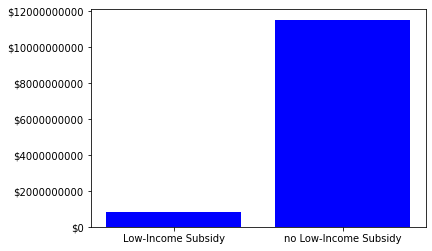

In [48]:
name = ["Low-Income Subsidy","no Low-Income Subsidy"]
cost_sum = [share_lis_sum, share_nolis_sum]
x_axis = np.arange(len(cost_sum))

fig, ax = plt.subplots()

plt.bar(x_axis, cost_sum, color='b', alpha=1.0, align="center")

ax.yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, name)




In [11]:
cost_diff = clean_file[["year", "coverage_type", "beneficiary_cost_share_lis", "beneficiary_cost_share_no_lis"]]
clean_cost = cost_diff.dropna(how="any")
clean_cost

,year,coverage_type,beneficiary_cost_share_lis,beneficiary_cost_share_no_lis
0,2010,Part D,6931345.55,3.125533e+07
1,2011,Part D,7000137.54,2.675276e+07
2,2012,Part D,6594393.26,3.310570e+07
3,2013,Part D,6872985.09,3.969171e+07
4,2014,Part D,6334112.63,4.326431e+07
...,...,...,...,...
547,2011,Part D,9505.49,4.006190e+05
548,2012,Part D,552264.01,1.952772e+07
549,2013,Part D,2407672.35,7.987834e+07
550,2014,Part D,4440035.46,1.494103e+08


In [46]:
grouped_year = clean_cost.groupby(["year"])

grped_cost= grouped_year["beneficiary_cost_share_lis","beneficiary_cost_share_no_lis"].sum()
grped_cost.reset_index(inplace = True)
years = grped_cost["year"]
grped_cost


C:\Users\Rome\AppData\Local\Temp/ipykernel_2140/2620297082.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grped_cost= grouped_year["beneficiary_cost_share_lis","beneficiary_cost_share_no_lis"].sum()


,year,beneficiary_cost_share_lis,beneficiary_cost_share_no_lis
0,2010,1.297656e+08,1.527816e+09
1,2011,1.382491e+08,1.453676e+09
2,2012,1.346519e+08,1.734741e+09
3,2013,1.423409e+08,2.133837e+09
4,2014,1.391342e+08,2.383533e+09
5,2015,1.170177e+08,2.274314e+09


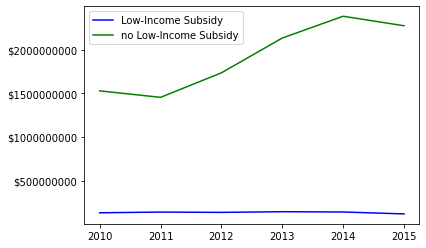

In [49]:
fig, ax = plt.subplots()

subsid, = plt.plot(years, grped_cost["beneficiary_cost_share_lis"], color="blue", label="Low-Income Subsidy" )
no_subsid, = plt.plot(years, grped_cost["beneficiary_cost_share_no_lis"], color="green", label="no Low-Income Subsidy" )

ax.yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))

plt.legend(handles=[subsid, no_subsid], loc="best")

plt.show()

In [3]:
# Compare the 5 year average for Part B and Part D drugs and find the spread

# Get Part B drugs
part_b = clean_df.loc[clean_df["coverage_type"] == "Part B"]

# Group by B drugs, find average total annual spending per user of each drug
drugs_b_group = part_b.groupby(["brand_name"])
average_annual_b = drugs_b_group["total_annual_spending_per_user"].mean().round(2)

# Get Part D drugs
part_d = clean_df.loc[clean_df["coverage_type"] == "Part D"]

# Group by D drugs, find average total annual spending per user of each drug
drugs_d_group = part_d.groupby(["brand_name"])
average_annual_d = drugs_d_group["total_annual_spending_per_user"].mean().round(2)

# Put results in dictionary to plot with later
averages = {
    "Part B Drugs": average_annual_b,
    "Part D Drugs": average_annual_d
}

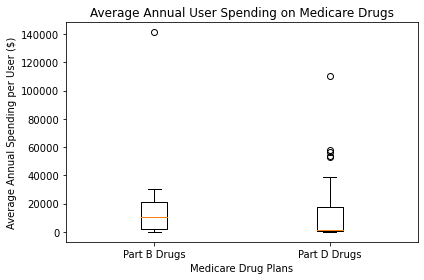

In [4]:
# Set up box plots using average total annual spent per user for each drug
fig1, ax1 = plt.subplots()
ax1.boxplot(averages.values())
ax1.set_xticklabels(averages.keys())
ax1.set_ylabel("Average Annual Spending per User ($)")
ax1.set_xlabel("Medicare Drug Plans")
ax1.set_title(
    "Average Annual User Spending on Medicare Drugs"
)

# Display box plots
plt.tight_layout()
plt.show()

In [5]:
# We will keep the boxplots with the outliers, but let's make one with the
# upper outliers removed from the data for better clarity for 95% of the data

# Find Part B upper bound, get subset of data with those removed
part_b_quartiles = average_annual_b.quantile([0.25, 0.75])
part_b_iqr = part_b_quartiles[0.75] - part_b_quartiles[0.25]
part_b_upper = part_b_quartiles[0.75] + (1.5*part_b_iqr)
b_no_outliers = average_annual_b[average_annual_b < part_b_upper]

# Find Part D upper bound, get subset of data with those removed
part_d_quartiles = average_annual_d.quantile([0.25, 0.75])
part_d_iqr = part_d_quartiles[0.75] - part_d_quartiles[0.25]
part_d_upper = part_d_quartiles[0.75] + (1.5*part_d_iqr)
d_no_outliers = average_annual_d[average_annual_d < part_d_upper]

averages_no_outliers = {
    "Part B Drugs": b_no_outliers,
    "Part D Drugs": d_no_outliers
}

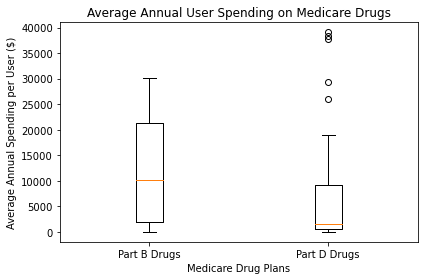

In [6]:
# Set up box plots using average total annual spent per user for each drug
fig2, ax2 = plt.subplots()
ax2.boxplot(averages_no_outliers.values())
ax2.set_xticklabels(averages_no_outliers.keys())
ax2.set_ylabel("Average Annual Spending per User ($)")
ax2.set_xlabel("Medicare Drug Plans")
ax2.set_title(
    "Average Annual User Spending on Medicare Drugs"
)

# Display box plots
plt.tight_layout()
plt.show()

In [9]:
# Find out what the outlier drugs are
b_outliers = average_annual_b[average_annual_b > part_b_upper]
d_outliers = average_annual_d[average_annual_d > part_d_upper]

print(b_outliers)
print(d_outliers)

brand_name
Remodulin    141158.65
Name: total_annual_spending_per_user, dtype: float64
brand_name
Gleevec         56415.21
H.P. Acthar    110228.43
Letairis        52716.65
Revlimid        53415.01
Tracleer        58045.23
Name: total_annual_spending_per_user, dtype: float64
